# Business Context of the dataset we will work on ?
Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.



# Dataset Description
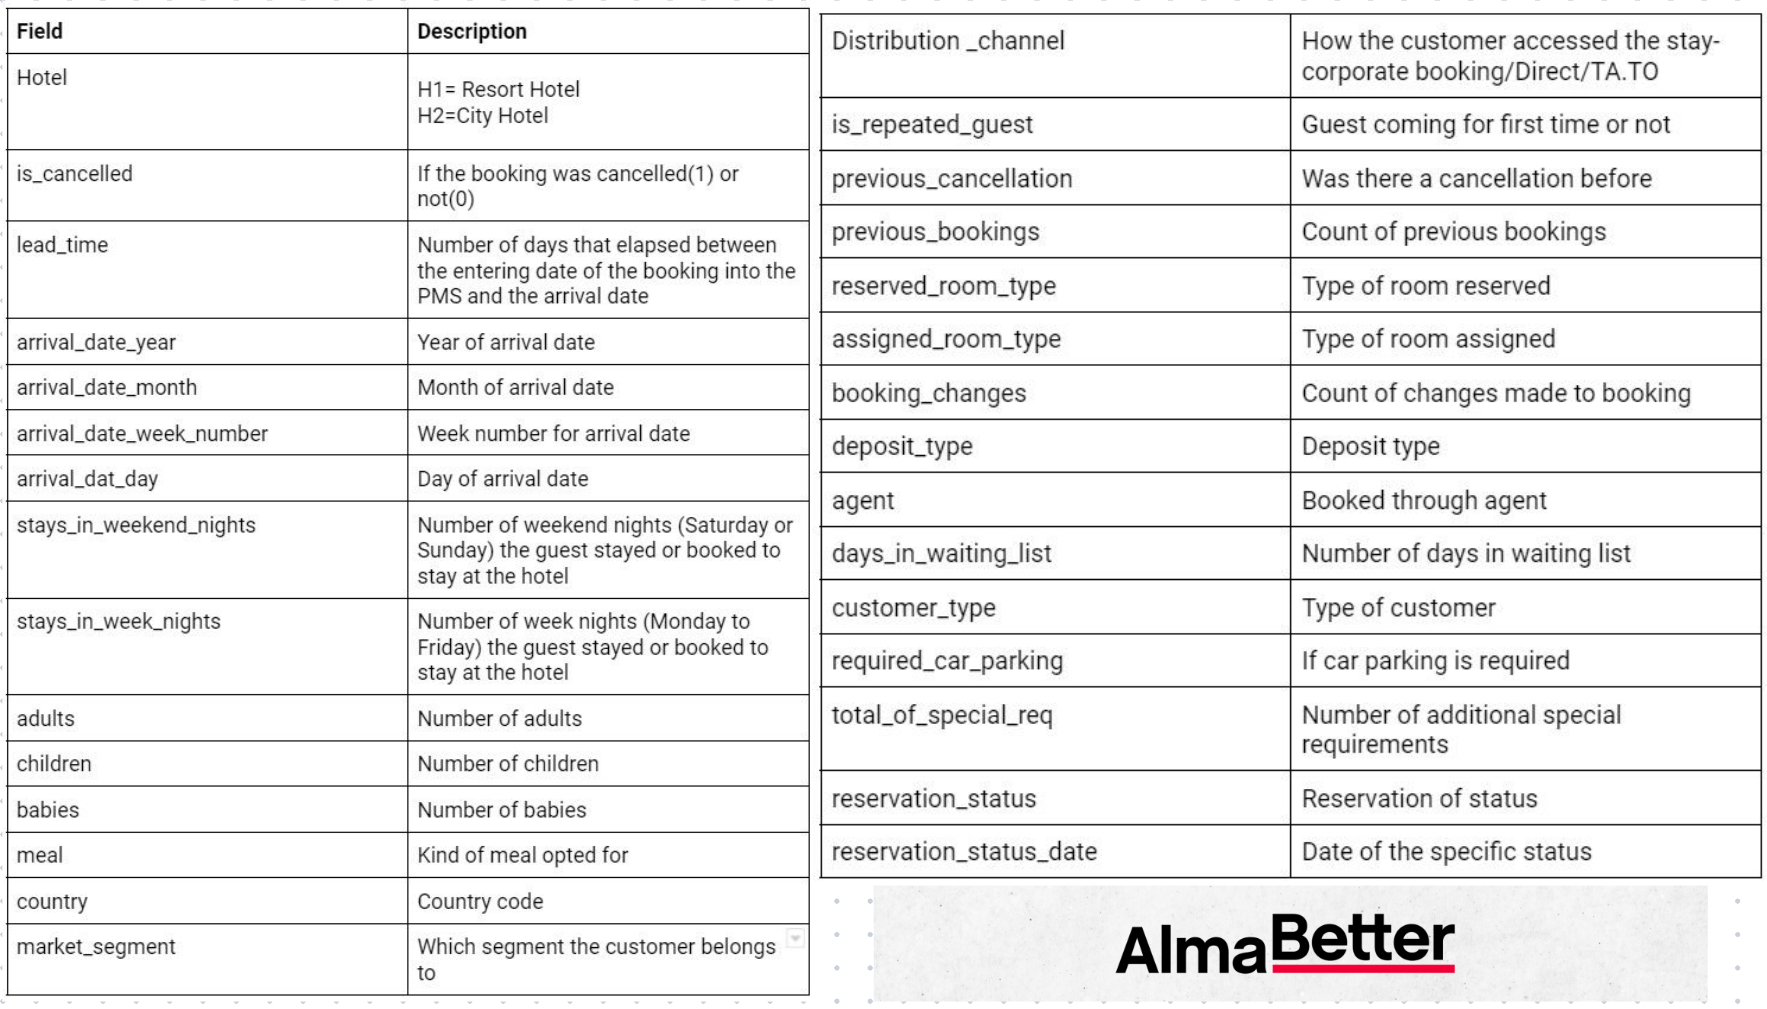

## To perform EDA on this dataset we will follow the below steps :-
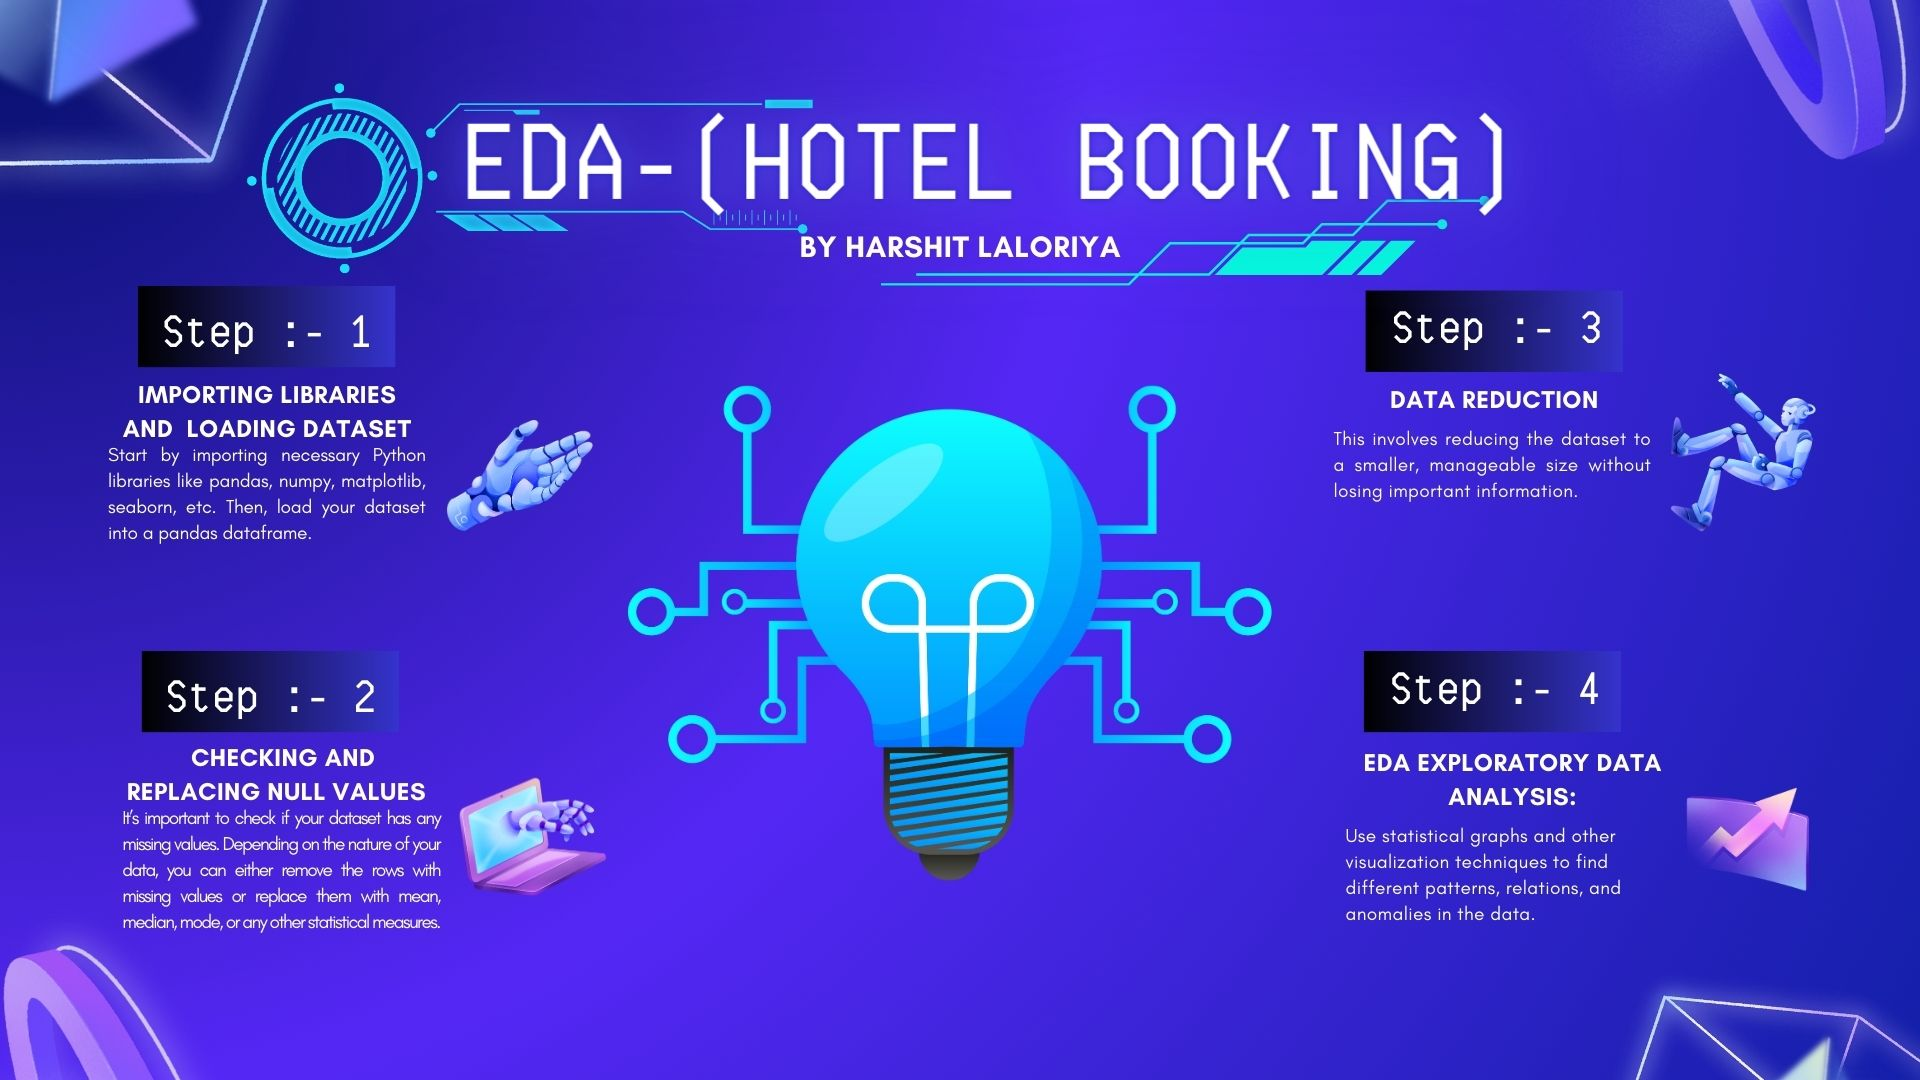

### Before jumping to this project we must have to know
# What is EDA?
-Exploratory data analysis (EDA) is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers you need, making it easier for data scientists to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

EDA is primarily used to see what data can reveal beyond the formal modeling or hypothesis testing task and provides a provides a better understanding of data set variables and the relationships between them. It can also help determine if the statistical techniques you are considering for data analysis are appropriate. Originally developed by American mathematician John Tukey in the 1970s, EDA techniques continue to be a widely used method in the data discovery process today.(Source :- IBM)

# Importing required libraries for this project.

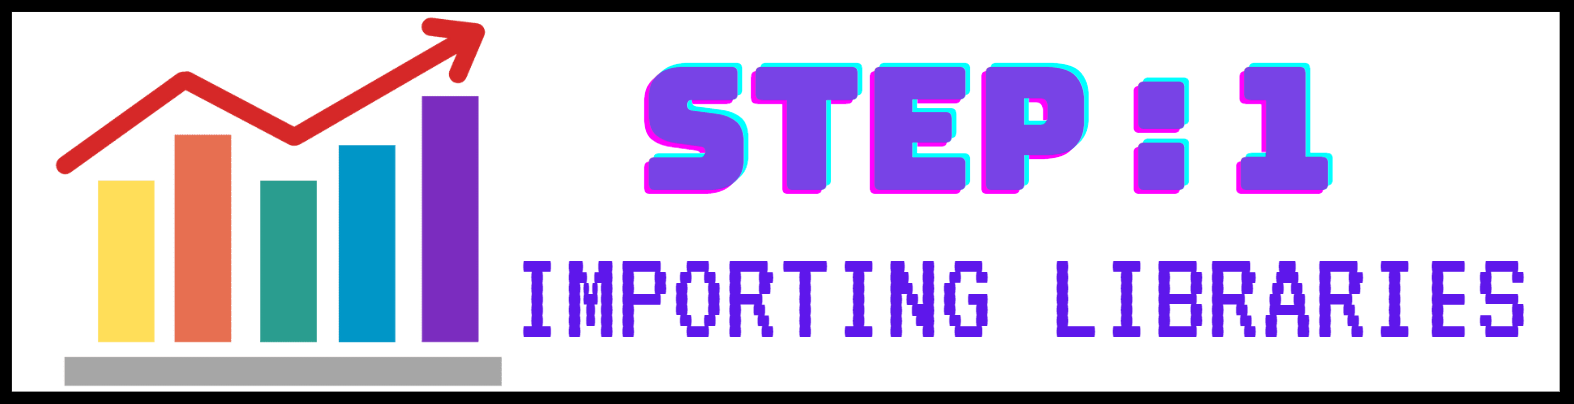

In [453]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount(r'/content/drive')

In [454]:
# view max_columns
pd.set_option('display.max_columns', 32)

In [455]:
# loading dataset
dataset_df = pd.read_csv('/content/drive/MyDrive/Hotel Bookings.csv')
dataset_df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [456]:
# Total rows and columns of this Dataset
dataset_df.shape

(119390, 32)

In [457]:
# looking for first five records
dataset_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [458]:
# looking for last five records
dataset_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [459]:
# looking for some info about dataset_df
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [460]:
# description of the data in the DataFrame.
dataset_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [461]:
# count different types of data types present in this dataset
dataset_df.dtypes.value_counts()

int64      16
object     12
float64     4
Name: count, dtype: int64

The BASIC THINGS WE UNDERSTAND FROM THIS DATASET ARE:-
1. Shape of this dataset which is 119390 rows × 32 columns.
2. Number of Headers this dataset has is 32.
3. This dataset contains 119390 records.
3. This dataset has some missing/unwanted or null values which leads to some errors(during analysis).
4. The Headers with null values are :- [ 'children' , 'country', 'agent', 'company']
5. There is three type of Data present in this dataset.
        - 16 columns have int values.
        - 12 of them have strings or objects.
        - 4 contains float values.

# Checking and Replacing NULL values
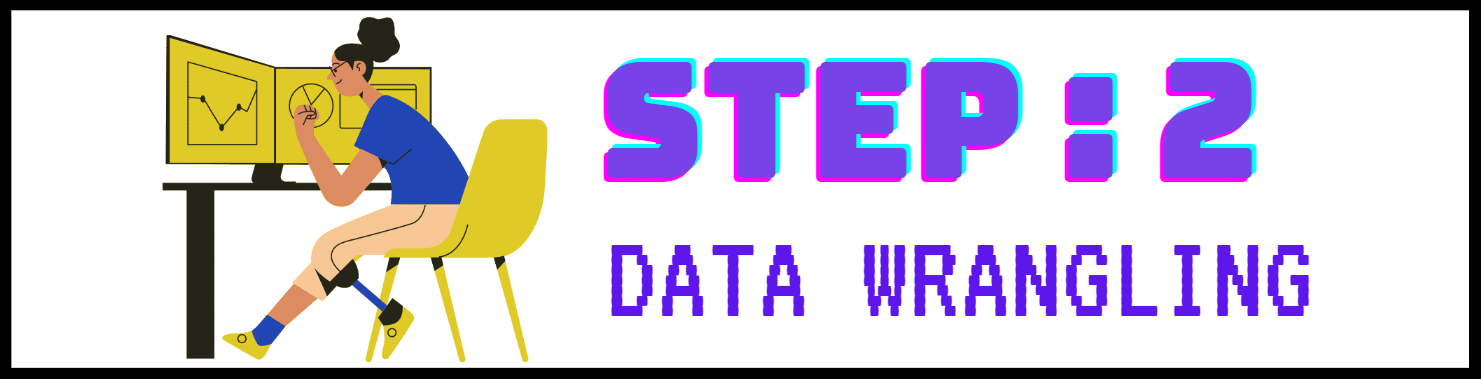

### Droping Duplicates

In [462]:
# Let's just simply find the total number of duplicate records this dataset contains and determine if they should be removed or handled.
duplicate_records = dataset_df.duplicated().sum()
f'The Dataset has {duplicate_records} duplicate records in total, making about {round(duplicate_records*100/dataset_df.shape[0])}% of this dataset'

'The Dataset has 31994 duplicate records in total, making about 27% of this dataset'

If we think logically it is very unlikely to have same/duplicate record's a hotel booking databases can have.
So, this indicates that we make the conclusion that no two or more records should have the same or exact details. Hence, it is better to remove those duplicate records.




In [463]:
# droping duplicate records
dataset_df.drop_duplicates(inplace= True)

### Null values

In [464]:
# looking for the null values
Total_null_values_in_each_column = dataset_df.isnull().sum()
df = pd.DataFrame({'Null Values' : Total_null_values_in_each_column, 'in %' : round(Total_null_values_in_each_column*100/dataset_df.shape[0],3)})
df

,Null Values,in %
hotel,0,0.000
is_canceled,0,0.000
lead_time,0,0.000
arrival_date_year,0,0.000
arrival_date_month,0,0.000
arrival_date_week_number,0,0.000
arrival_date_day_of_month,0,0.000
stays_in_weekend_nights,0,0.000
stays_in_week_nights,0,0.000
adults,0,0.000


The 'company' column clearly has a significant percentage of null values—roughly 94%. The 'country' and 'agent' columns have less null values than the 'company' column; the 'country' column has just 0.517% of empty values, the 'agent' column has almost 14%, and the 'children' column has 0.005% of null values.

In [465]:
# unique values of children column
dataset_df['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

Since the  'children' column has a very very low percentage of null's and has only 0 and 1 as  values,  we will try to handle the missing values  instead of dropping this column. We will replace nan with 0 which means 0 children.

In [466]:
# Looking for all 4 records with nan value
dataset_df.loc[dataset_df['children'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [467]:
# manipulating 'children' column
dataset_df.loc[dataset_df['children'].isnull(), 'children'] = 0

In [468]:
# checking for all updates are done properly or not
dataset_df['children'].isnull().sum()

0

The 'Country' column consists of 0.5% of nulls. We can drop this column because of a low percentage of null values, but dropping a column isn't a good practice always if it is manageable then we do try to fix it.
We know that this column represents country. so, i think we should replace the null values as 'other' this will indicates us that the person or family which has null values is from other country .

In [469]:
# unique values of country column
dataset_df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [470]:
# Looking for records with nan value
dataset_df.loc[dataset_df['country'].isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
30,Resort Hotel,0,118,2015,July,27,1,4,10,1,0.0,0,BB,NaN,Direct,Direct,0,0,0,A,A,2,No Deposit,NaN,NaN,0,Transient,62.0,0,2,Check-Out,2015-07-15
4127,Resort Hotel,1,0,2016,February,8,15,0,0,0,0.0,0,SC,NaN,Offline TA/TO,TA/TO,0,0,0,P,P,0,No Deposit,NaN,383.0,0,Transient,0.0,0,0,Canceled,2016-02-15
7092,Resort Hotel,1,8,2016,July,30,21,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,204.0,0,Transient,73.0,0,2,Canceled,2016-07-20
7860,Resort Hotel,1,39,2016,August,36,30,0,5,2,0.0,0,HB,NaN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,159.0,0,5,Canceled,2016-07-22
8779,Resort Hotel,1,0,2016,October,42,13,0,1,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,457.0,0,Transient,50.0,0,0,Canceled,2016-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60651,City Hotel,1,0,2016,November,47,17,4,11,0,0.0,0,SC,NaN,Corporate,Direct,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-11-17
61244,City Hotel,1,0,2016,December,50,6,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2016-12-06
65907,City Hotel,1,0,2017,April,15,10,0,0,0,0.0,0,SC,NaN,Complementary,Corporate,0,0,0,P,P,0,No Deposit,NaN,279.0,0,Transient,0.0,0,0,Canceled,2017-04-10
80830,City Hotel,0,4,2015,November,48,23,1,2,1,0.0,0,BB,NaN,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,70.0,0,0,Check-Out,2015-11-26


In [471]:
# manipulating 'country' column
dataset_df['country'].fillna('others', inplace=True)


In [472]:
# checking for all updates are done properly or not
dataset_df['country'].isnull().sum()

0

Now, we will deal with 'agent' column. So, as we saw above in the data description field description of 'agent' column is given as 'booked through agent' which means the booking agent of the family/person is given by agent column.

Thus, the 'agent' column contains around 14% null entries. Since we can assume that agent number 0 has a room reserved for the specific family or individual, we may replace all of the null with 0.


In [473]:
# unique values of agent column
dataset_df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [474]:
# Looking for records with nan value
dataset_df.loc[dataset_df['agent'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.00,0,0,Check-Out,2015-07-03
18,Resort Hotel,0,0,2015,July,27,1,0,1,2,0.0,0,BB,FRA,Corporate,Corporate,0,0,0,A,G,0,No Deposit,NaN,110.0,0,Transient,107.42,0,0,Check-Out,2015-07-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119124,City Hotel,0,0,2017,August,35,29,0,1,1,0.0,0,BB,PRT,Complementary,Corporate,0,0,0,A,A,0,No Deposit,NaN,72.0,0,Transient,0.00,0,2,Check-Out,2017-08-30
119151,City Hotel,0,0,2017,August,35,29,0,1,2,2.0,0,BB,NLD,Direct,Direct,0,0,0,G,G,0,No Deposit,NaN,NaN,0,Transient,270.00,0,0,Check-Out,2017-08-30
119166,City Hotel,0,0,2017,August,35,30,0,1,1,0.0,0,BB,BRA,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,0,Check-Out,2017-08-31
119215,City Hotel,0,2,2017,August,35,31,0,1,1,0.0,0,SC,LBN,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,NaN,0,Transient,140.00,0,2,Check-Out,2017-09-01


In [475]:
# manipulating 'agent' column
dataset_df['agent'].fillna(0, inplace=True)

In [476]:
# checking for all updates are done properly or not
dataset_df['agent'].isna().sum()

0

# Data Reduction
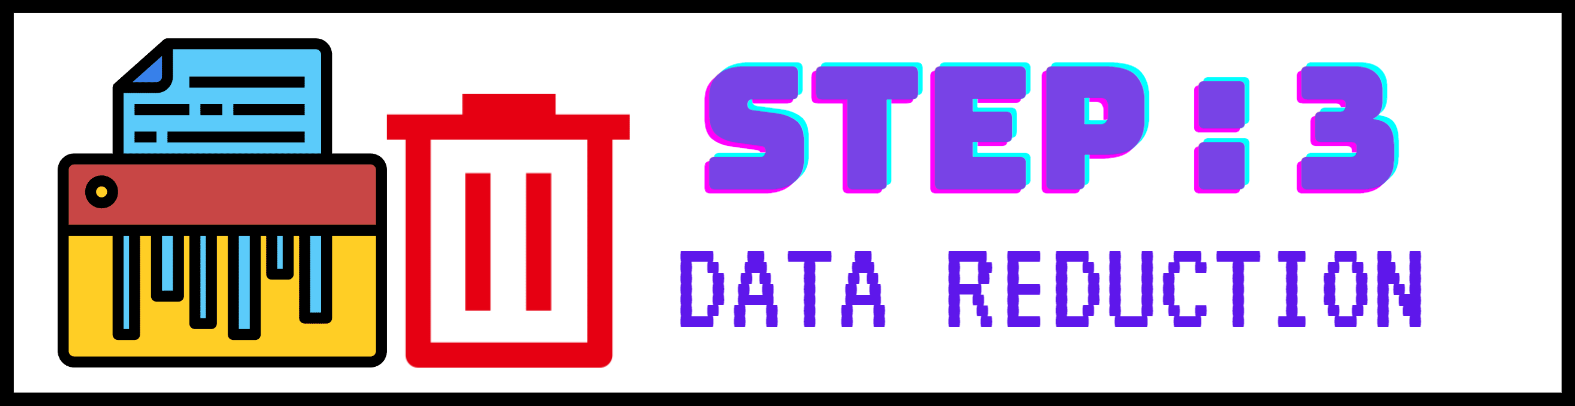

In [477]:
dataset_df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

As you can see the 'company' column contains so many null values as well as many unique value's. Therefore, it makes no sense for this wide range of data if we substitute these null values with any arbitrary value. So, its better to drop this column.

In [478]:
# droping company column
dataset_df.drop('company', axis = 1, inplace = True)

In [479]:
# Create new columns by combining other columns
dataset_df['Number_of_guests'] = dataset_df['adults'] +  dataset_df['children']  +  dataset_df['babies']

Our new column, "Number_of_guests," is the total of the columns labeled "adults", "children", and "babies". The additional columns labeled "adults", "children" and "babies" are no longer necessary. So, these columns can be removed.


In [480]:
# droping multiple columns
dataset_df.drop(['adults','children','babies'], axis = 1, inplace= True)

In [481]:
# Create new columns by combining other columns
dataset_df['Total_nights_stay'] = dataset_df['stays_in_weekend_nights'] + dataset_df['stays_in_week_nights']

A new column called "Total_nights_stay" has been created by combining the values of "stays_in_weekend_nights" and "stays_in_weeknights." We can therefore remove these unnecessary columns at this time.

In [482]:
# droping multiple columns
dataset_df.drop(['stays_in_weekend_nights','stays_in_week_nights'], axis=1, inplace= True)

It is very important that all the column's have the right data type.
Lets check it.

In [483]:
# checking datatype
dataset_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

Here, we can observe that the column named "Number_of_guests" has float as its datatype when, logically, it should have int.

In [484]:
# changing data type
dataset_df = dataset_df.astype({'Number_of_guests':'int64'})

All set now we can perform eda on this DataFrame.

# EDA - EXPLORATORY DATA ANALYSIS
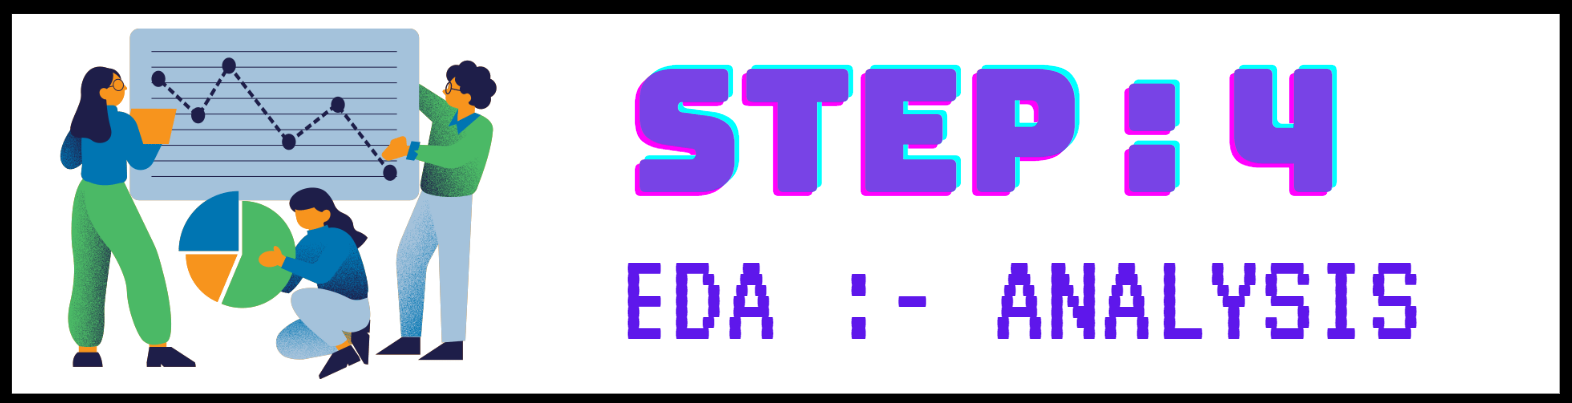

In [485]:
# Determine the Continuous and Categorical data columns
categorical_data = dataset_df.select_dtypes(include=['object']).columns
continous_data = dataset_df.select_dtypes(include=['int64']).columns
{"categorical": len(categorical_data), "continous" : len(continous_data)}

{'categorical': 12, 'continous': 14}

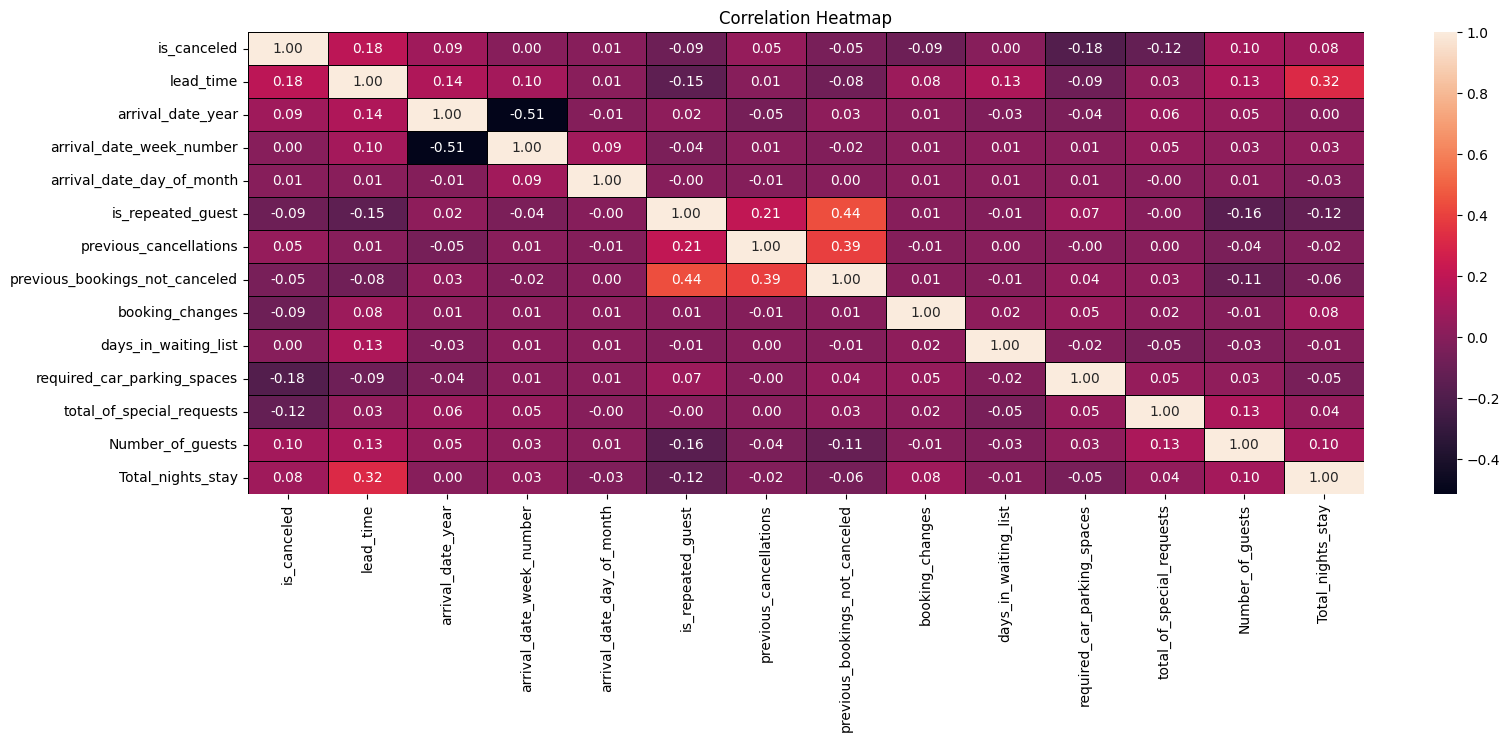

In [486]:
# correlation matrix
corr_matrix = dataset_df[continous_data].corr()

# Create a heatmap using seaborn
plt.figure(figsize=(18, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=0.5, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

<BarContainer object of 10 artists>

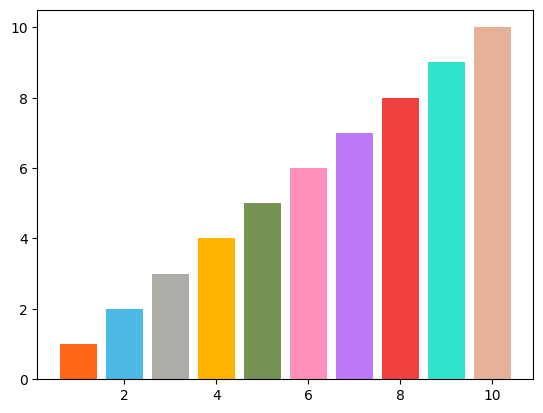

In [487]:
pallete = ["#FE6816","#4CB9E7","#ADACA7","#FFB400","#769353",'#FF90BC',"#BC7AF9","#EF4040","#30E3CA", "#E5B299"]
plt.bar([1,2,3,4,5,6,7,8,9,10], [1,2,3,4,5,6,7,8,9,10], color = pallete)

In [488]:
# grouping
group = dataset_df.groupby(by='hotel')
city = group.groups.get('City Hotel')
resort = group.groups.get('Resort Hotel')

In [489]:
#  My count plot functio to draw custome bars
def my_countplot(column : str, hotel = 'Overall' , subplot = 1, percentage = True, graph = 'countplot', title = 'Overall', top_x = 10, show_count = False, bar_xticks = None ,pie_labels=None):
    # condition for hotel parameter
    if type(hotel) != str:
        plt.subplot(1,2,subplot)
        df = dataset_df.loc[hotel]
        font = 10
    else:
        df = dataset_df
        font = 18

    # filtering
    series = df[column].value_counts()[:top_x]

    # function for countplot
    if graph in ('countplot', 'countplot%'):
        percentage_list = [round(i*100/sum(series.values),2) for i in series]

        # condition for graph parameter
        if graph == 'countplot':
            val = series.values
        elif graph == 'countplot%':
            val = percentage_list

        # Graph Creation
        plt.bar(series.index.astype('str'), val, color = pallete, zorder=3)
        
        # condition for percentage perameter
        if percentage:
            for i, value in enumerate(percentage_list):
                plt.text(i, value, f"{value}%", ha='center', fontsize = font)

        # condition for show_count parameter
        if show_count:
            for i, value in enumerate(series.values):
                plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
        plt.ylabel("")

        # custom xticks for bar graph
        if bar_xticks != None:
            plt.xticks(series.index.astype('str') ,bar_xticks)

        plt.grid(True, linestyle='--', alpha=0.5, zorder=0)
    

    # function for pie chart
    if graph == 'pie':
        plt.pie(series,  autopct="%.2f%%", textprops={'fontsize':20}, explode = [0,0.1], labels=pie_labels, colors = pallete[::2])

    # title of graph
    plt.title(title, fontsize = '24')


## <b> Q1.</b> What are the Total Number of bookings and Cancellations?

### A. In terms of numbers

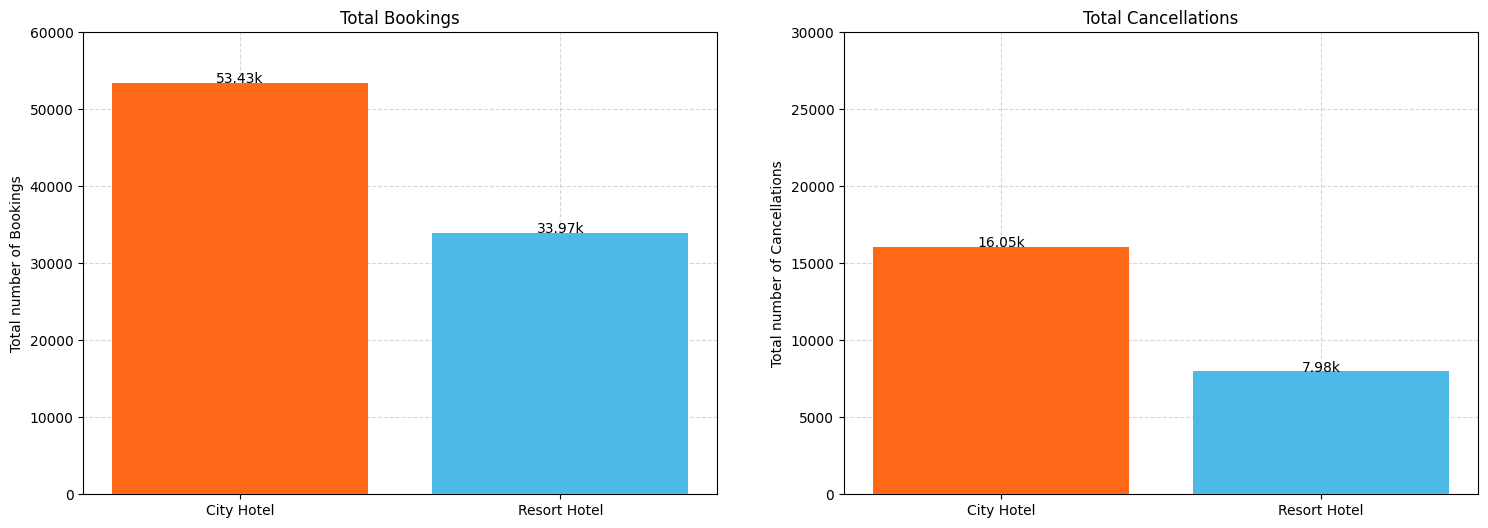

In [490]:
# defining series and functions for bar graph
series1 = dataset_df['hotel'].value_counts().rename("Total Bookings")
series2 = pd.Series({i : dataset_df.loc[dataset_df['hotel'] == i,'is_canceled'].sum() for i in sorted(dataset_df['hotel'].unique())}, name= "Total Cancellations")
df1 = pd.concat([series1, series2], axis=1)
plt.figure(figsize=(18, 6))
def my_bar(series : pd.Series, subplot : int):
    plt.subplot(1,2,subplot)
    plt.bar(series.index, series.values, color = pallete ,zorder= 3)
    for i, value in enumerate(series.values):
        plt.text(i, value, f"{round(value/1000, 2)}k", ha='center')
    plt.ylim((0,round((series.max()/10000)+1)*10000))
    plt.grid(True, linestyle='--', alpha=0.5, zorder=0)
    plt.title(series.name)
    plt.ylabel(' number of '.join(series.name.split()))
    
my_bar(series = series1, subplot=1)
my_bar(series= series2,subplot=2)
plt.show()

### B. Hotel wise booking vs cancellations

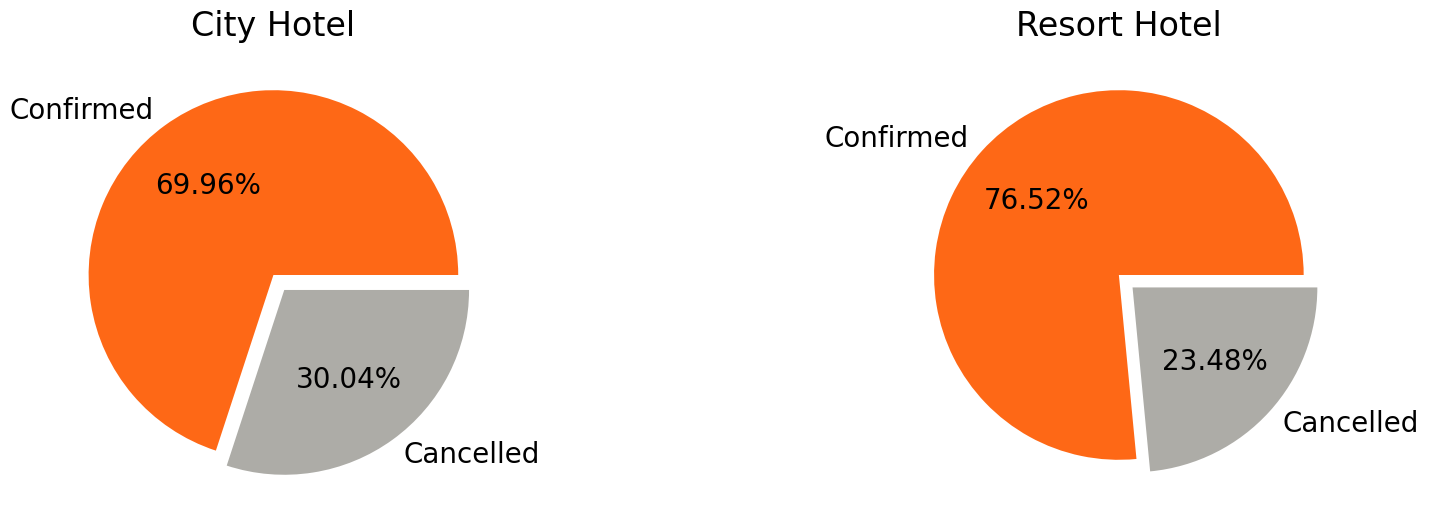

In [491]:
plt.figure(figsize=(20, 6))
my_countplot(hotel= city, column='is_canceled',graph='pie', title='City Hotel', pie_labels=['Confirmed', 'Cancelled'] )
my_countplot(hotel= resort, column='is_canceled',graph='pie', title='Resort Hotel', pie_labels=['Confirmed', 'Cancelled'] , subplot= 2)

## <b> Q2.</b> Which agent gets the most bookings?


### A. Hotel wise

In [492]:
# function to create graph for top 5 agents based on input
def agent_bookings(hotel = 'overall'):
    if hotel in ("Resort Hotel","City Hotel"):
        filt = (dataset_df["hotel"] == hotel)
    elif hotel == 'overall':
        filt = dataset_df.index
    else:
        print("Invalid Value")

    top5 = dataset_df.loc[filt, 'agent'].value_counts()
    plt.bar(top5.index.astype(dtype='str')[0:5],top5.values[:5], color = pallete, zorder=3)
    plt.grid(True, linestyle='--', alpha=0.5, zorder=0)
    plt.title(f'{hotel} : Top Five agents')
    plt.xlabel('agent')
    plt.ylabel('Number of bookings')

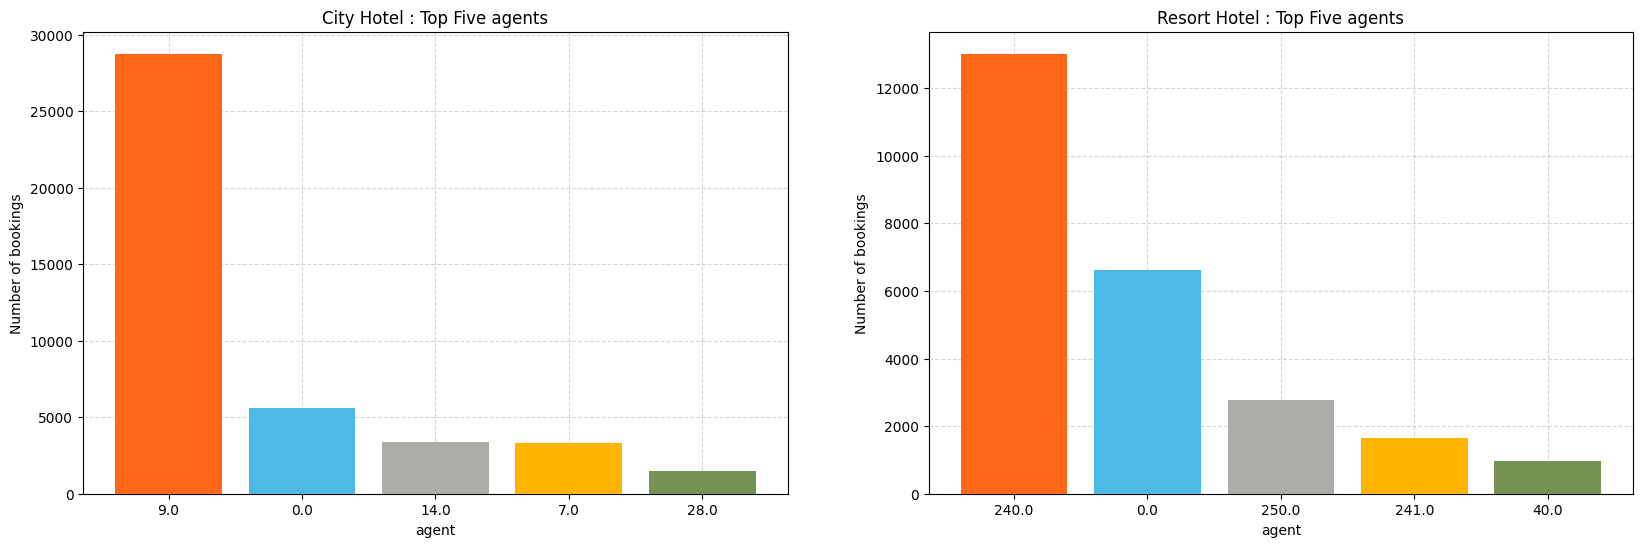

In [493]:
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
# top 5 agents : City Hotels
agent_bookings("City Hotel")

plt.subplot(1,2,2)
# top 5 agents : Resort Hotels
agent_bookings("Resort Hotel")

plt.show()

### B. Overall

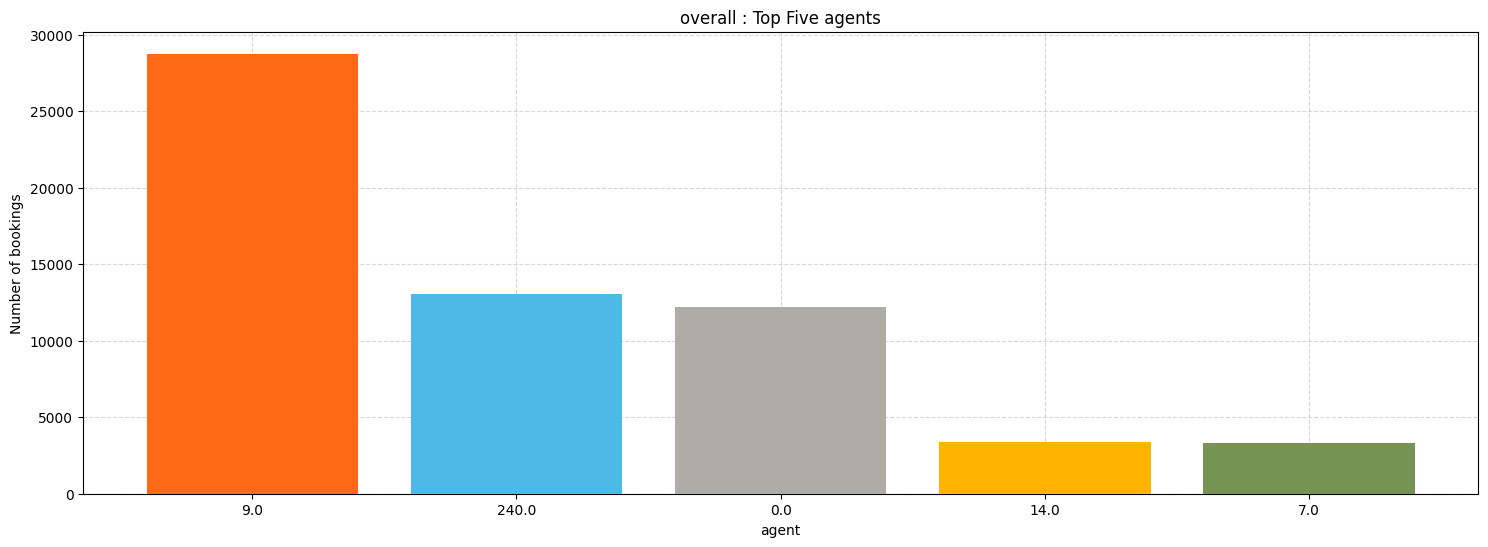

In [494]:
# top 5 agents : overall
plt.figure(figsize=(18, 6))
agent_bookings()

## <b> Q3.</b> Which channel distribution is more often use by customers?

### A. Hotel wise

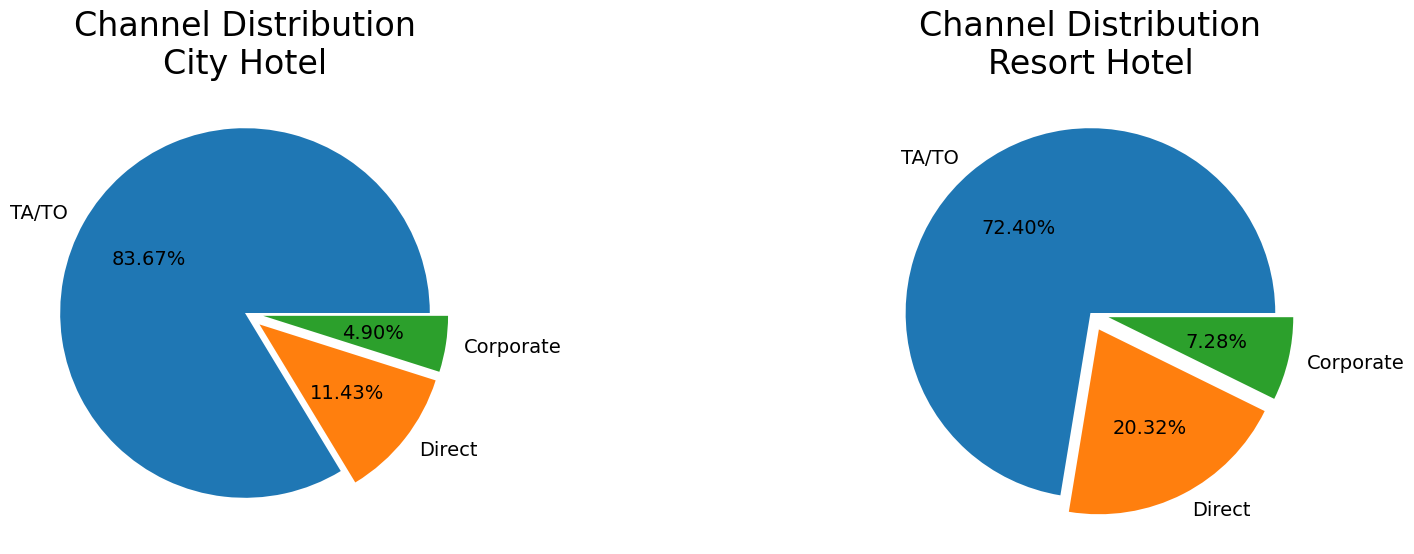

In [495]:
plt.figure(figsize=(20, 6))
# function to draw pie chart for comparison
def distro_pie(hotel, subplot :int, title : str):
    plt.subplot(1,2,subplot)
    series = dataset_df.loc[hotel,'distribution_channel'].value_counts()
    plt.pie(x = series.values[0:3],labels= series.index[0:3],autopct="%.2f%%", explode= [0,0.1,0.1],textprops={'fontsize':14})
    plt.title(f'Channel Distribution\n{title}', fontsize = '24')

distro_pie(city, 1, 'City Hotel')
distro_pie(resort, 2, "Resort Hotel")
plt.show()

### B. overall

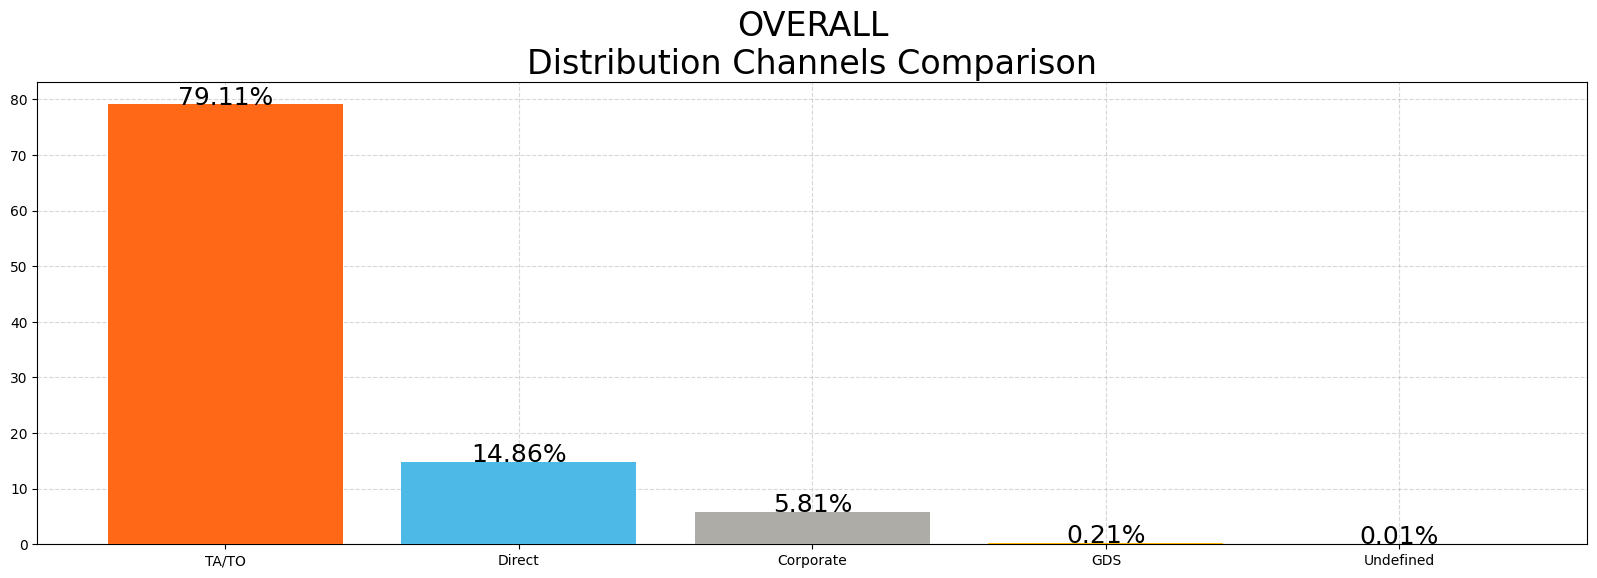

In [496]:
plt.figure(figsize=(20, 6))
my_countplot(column='distribution_channel', graph='countplot%', title="OVERALL\nDistribution Channels Comparison")

## <b> Q4.</b> Which Meal is the most favroite\\Opted meal by a customers?

### A. Hotel wise

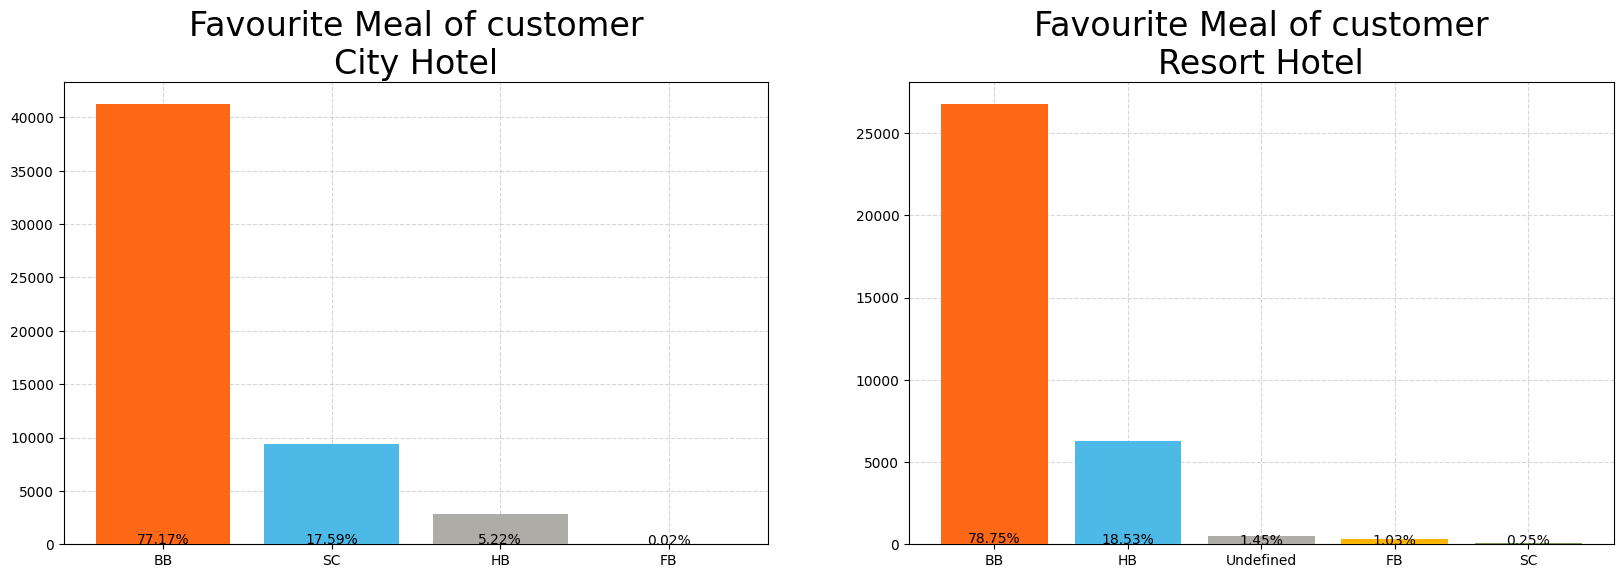

In [497]:
# Hotel wise meal preferance
plt.figure(figsize=(20, 6))
string = 'Favourite Meal of customer'
my_countplot(column='meal',hotel = city, title = f"{string}\nCity Hotel", subplot= 1)
my_countplot(column='meal',hotel = resort, title = f"{string}\nResort Hotel", subplot= 2)

### B. Overall

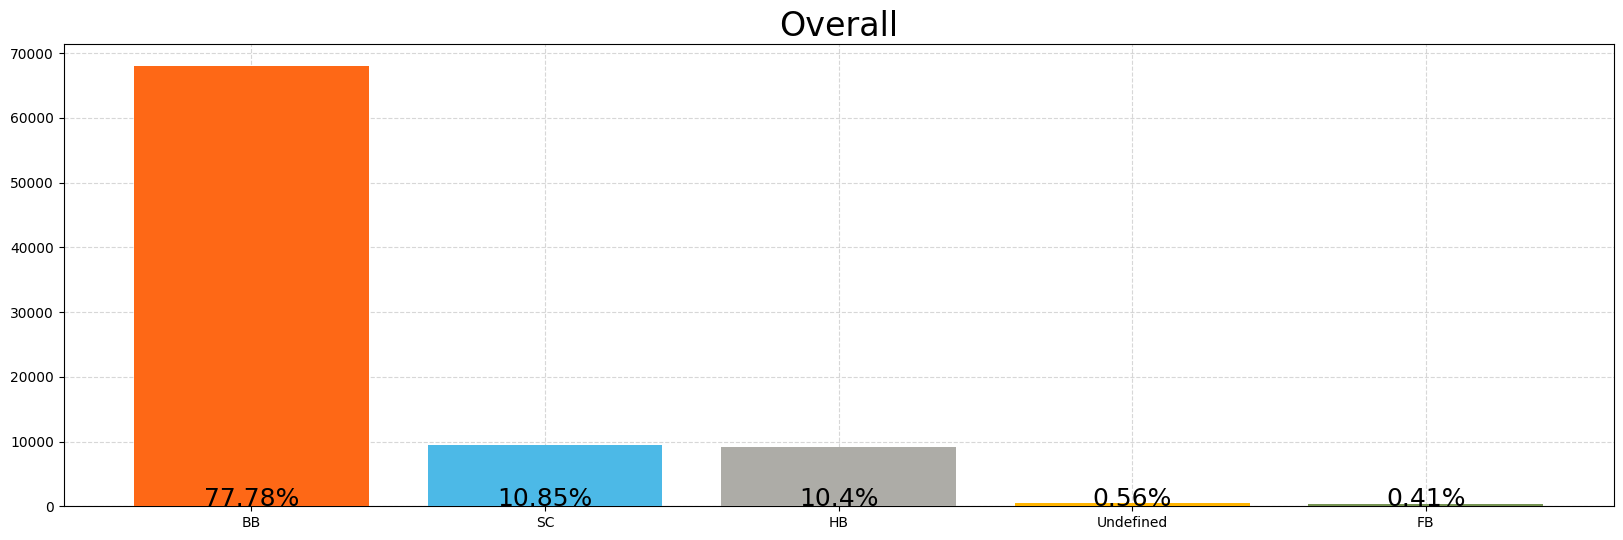

In [498]:
# overall meal preferance
plt.figure(figsize=(20, 6))
my_countplot(column= 'meal')

## **Q5.** Which country makes the most reservations?

### A. Hotel wise

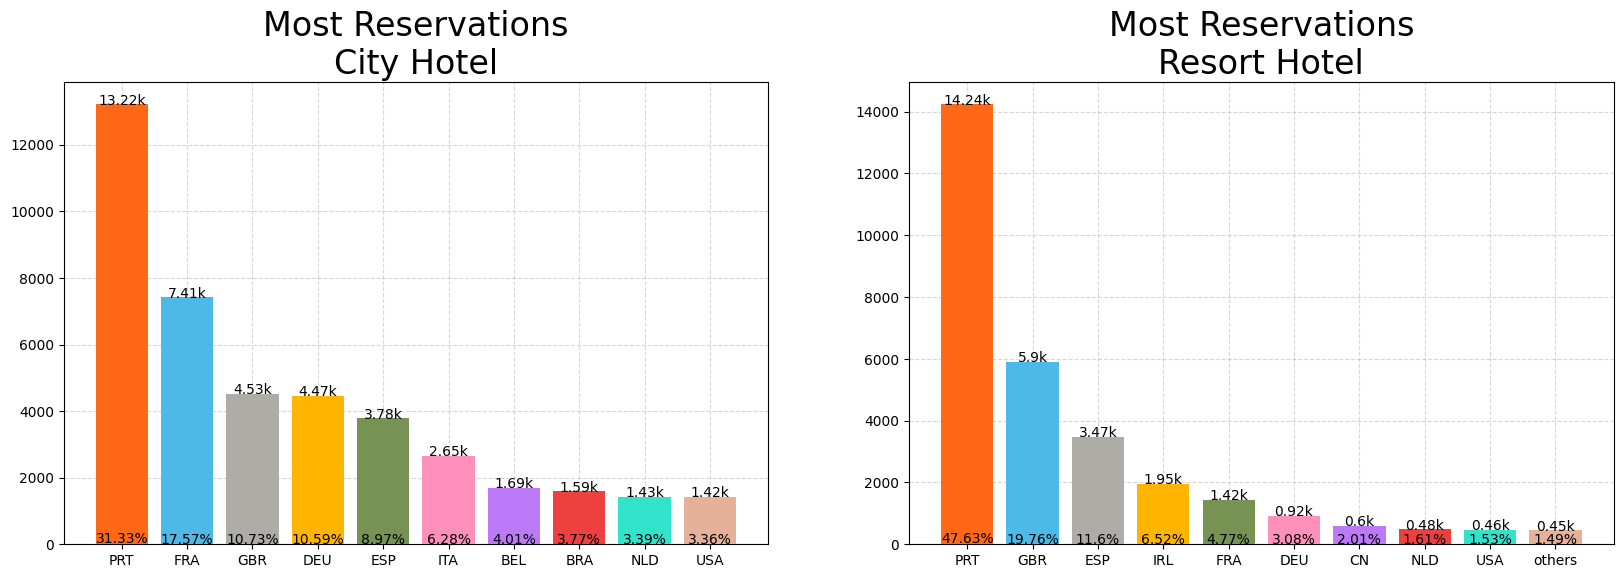

In [499]:
# hotel wise top 10 countries
plt.figure(figsize=(20, 6))
string = "Most Reservations"
my_countplot(column='country', hotel=city, title=f"{string}\nCity Hotel", subplot=1, show_count = True)
my_countplot(column='country', hotel=resort, title=f"{string}\nResort Hotel", subplot=2, show_count = True)

### B. Overall

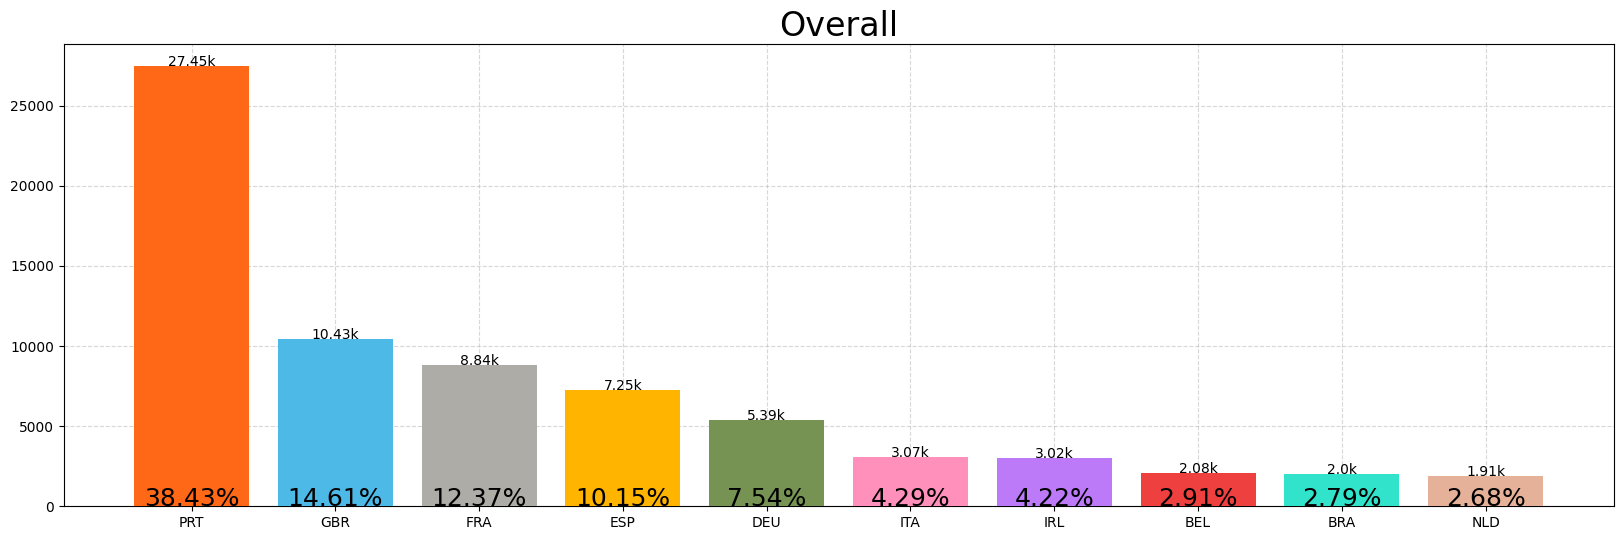

In [500]:
# top 10 countries
plt.figure(figsize=(20, 6))
my_countplot(column='country', show_count = True)

## **Q5.** which room type got more reservations?

### A. Hotel wise

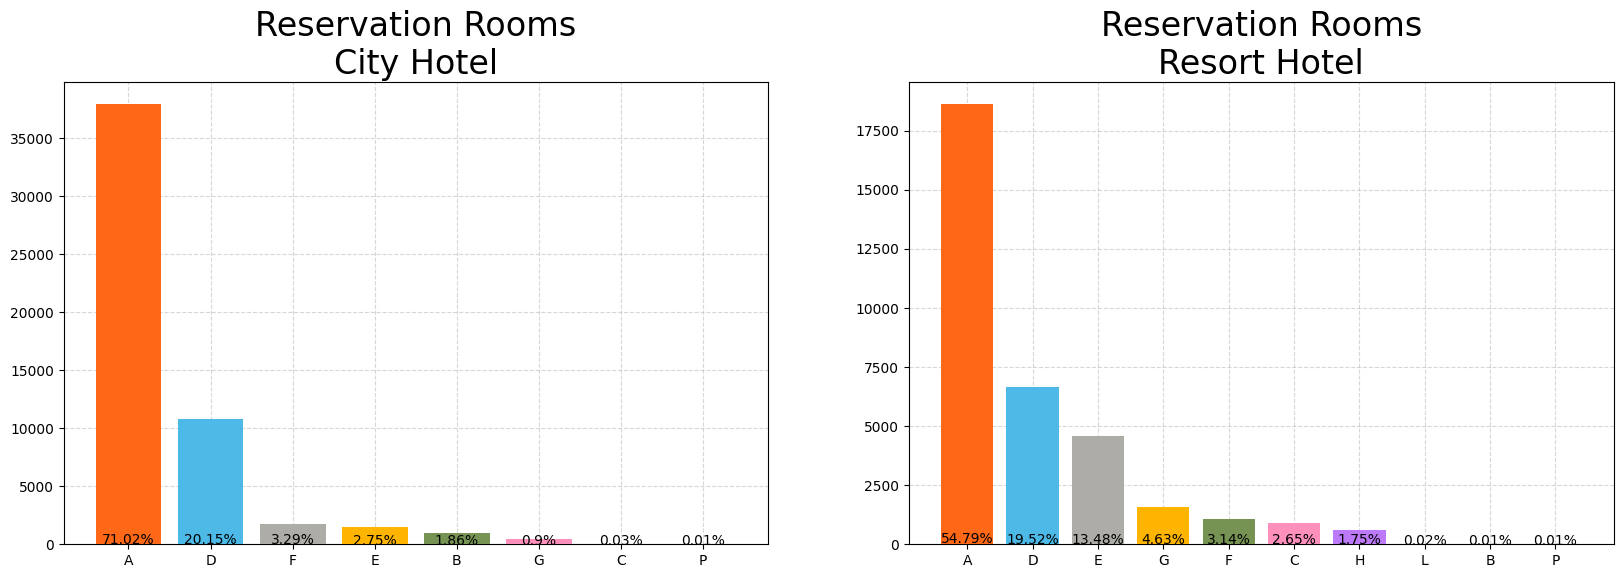

In [501]:
# hotel wise preferred reservation room
plt.figure(figsize=(20, 6))
string = 'Reservation Rooms'
my_countplot(column = 'reserved_room_type', hotel = city, subplot = 1, title = f"{string}\nCity Hotel")
my_countplot(column = 'reserved_room_type', hotel = resort, subplot = 2, title = f"{string}\nResort Hotel")

### B. Overall

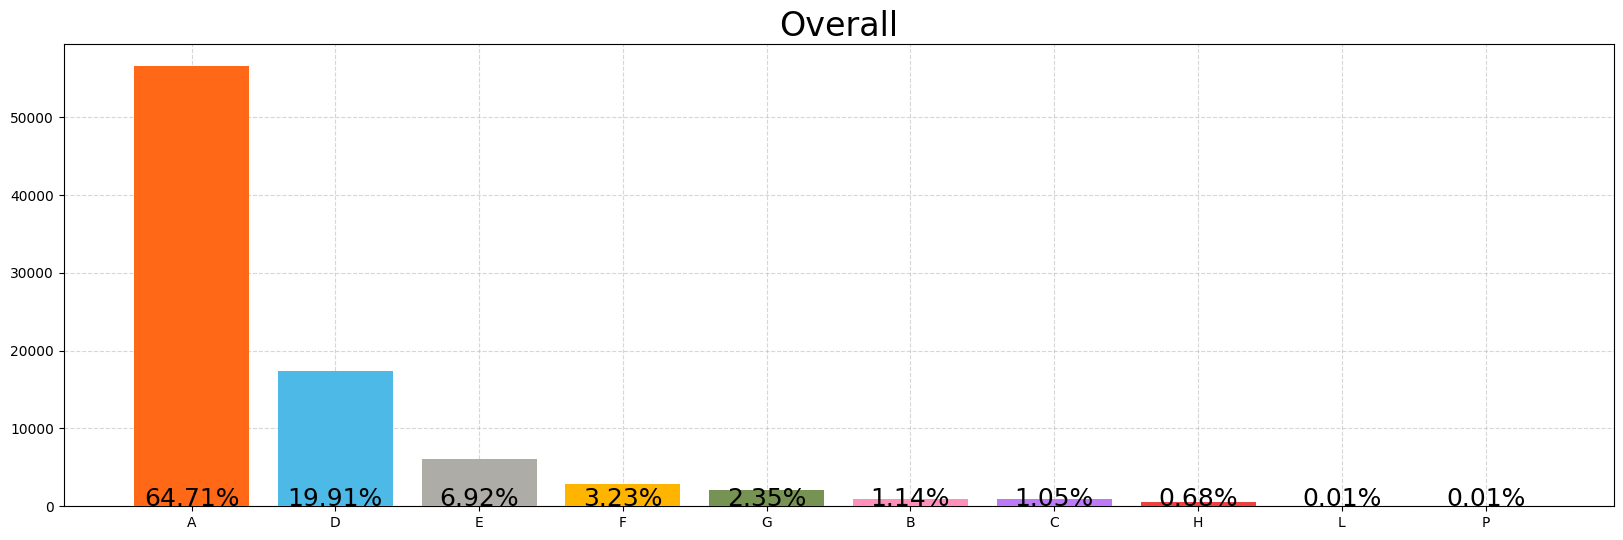

In [502]:
# overall preferred reservation room
plt.figure(figsize=(20, 6))
my_countplot(column = 'reserved_room_type')

## **Q6.** In which year more reservations are made?

### A. Hotel wise

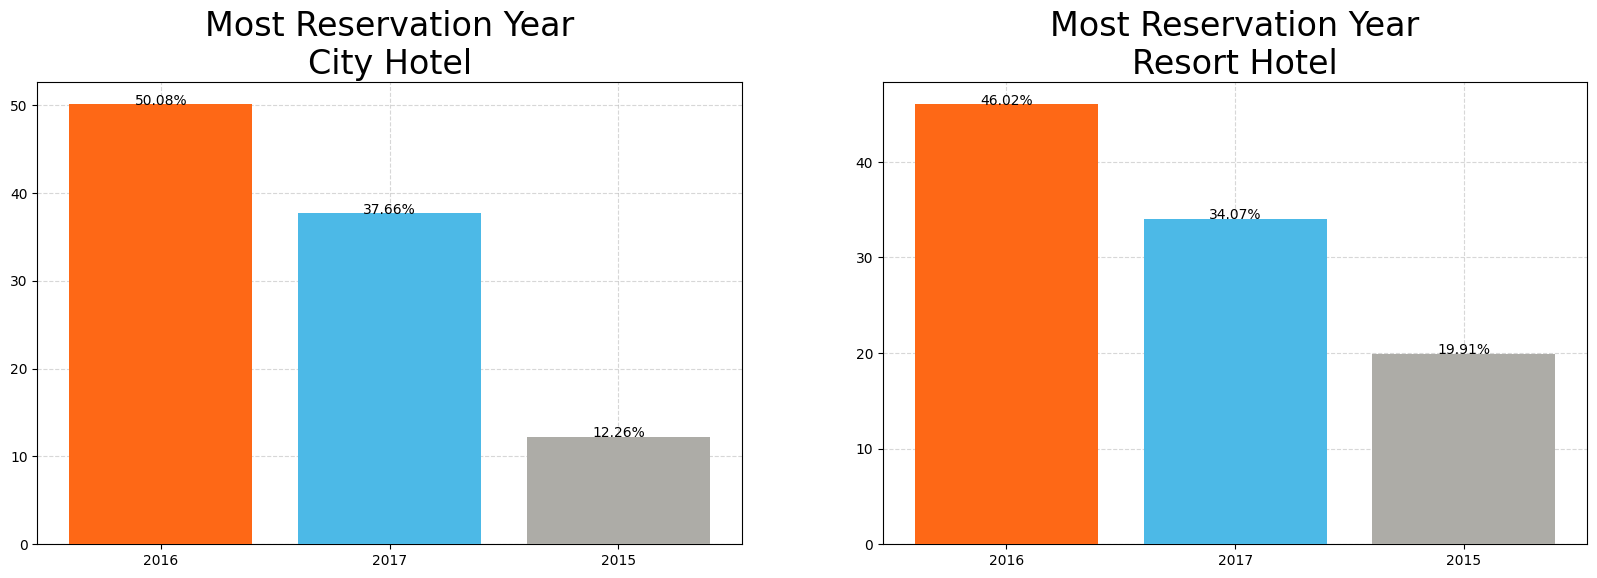

In [503]:
plt.figure(figsize=(20, 6))
my_countplot(column = 'arrival_date_year', hotel = city, subplot= 1, graph='countplot%', title = 'Most Reservation Year\nCity Hotel')
my_countplot(column = 'arrival_date_year', hotel = resort, subplot= 2, graph='countplot%', title = 'Most Reservation Year\nResort Hotel')


### B. Overall

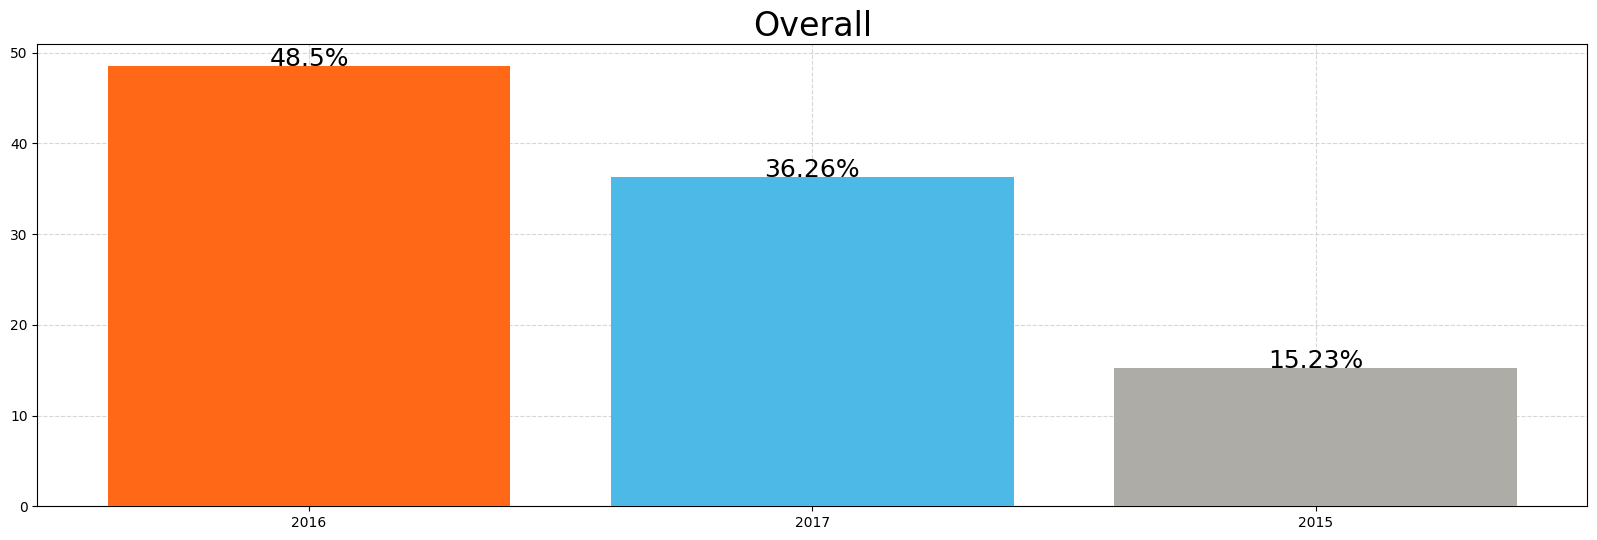

In [504]:
plt.figure(figsize=(20, 6))
my_countplot(column = 'arrival_date_year', graph='countplot%')

## **Q7.** In which Month more reservations was made?

### A. Hotel wise

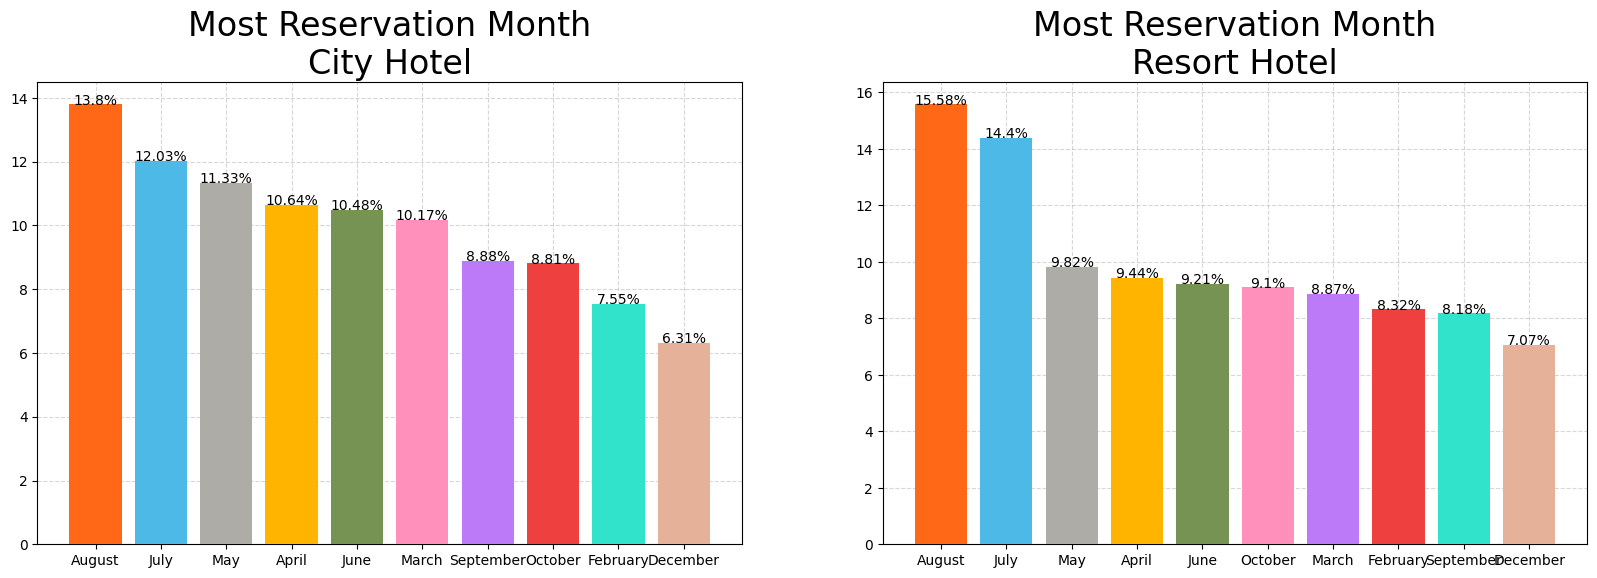

In [505]:
plt.figure(figsize=(20, 6))
my_countplot(column = 'arrival_date_month', hotel = city, subplot= 1, graph='countplot%', title = 'Most Reservation Month\nCity Hotel')
my_countplot(column = 'arrival_date_month', hotel = resort, subplot= 2, graph='countplot%', title = 'Most Reservation Month\nResort Hotel')

### B. Overall

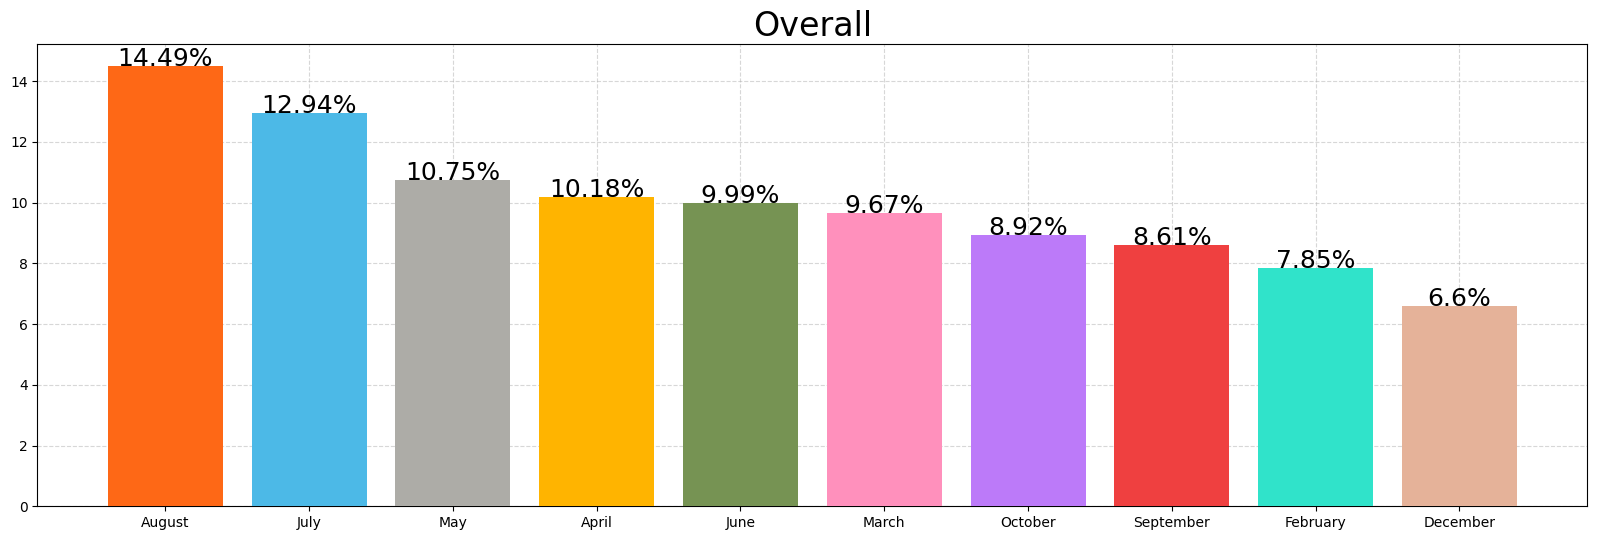

In [506]:
plt.figure(figsize=(20, 6))
my_countplot(column = 'arrival_date_month', subplot= 1, graph='countplot%')

## **Q8.** How many reservation were made by repeated guests?

### A. Hotel wise

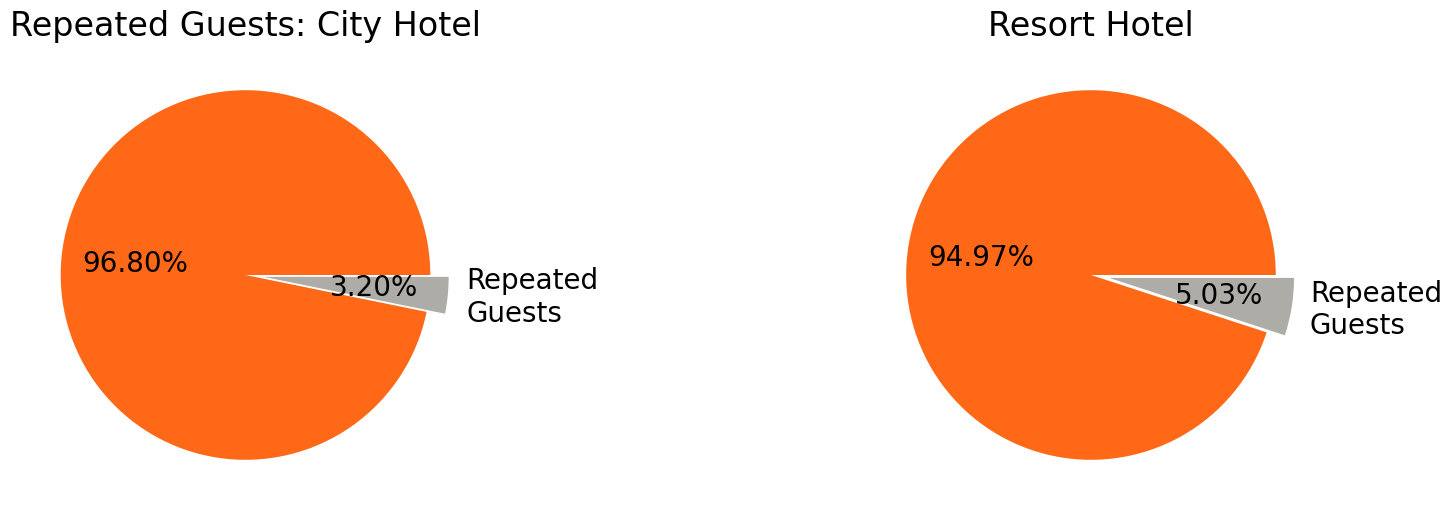

In [507]:
plt.figure(figsize=(20, 6))
my_countplot(hotel= city, column='is_repeated_guest', graph='pie', pie_labels=['', 'Repeated\nGuests'], title='Repeated Guests: City Hotel')
my_countplot(hotel= resort, column='is_repeated_guest', graph='pie', pie_labels=['', 'Repeated\nGuests'], title='Resort Hotel', subplot= 2)

### B. Overall

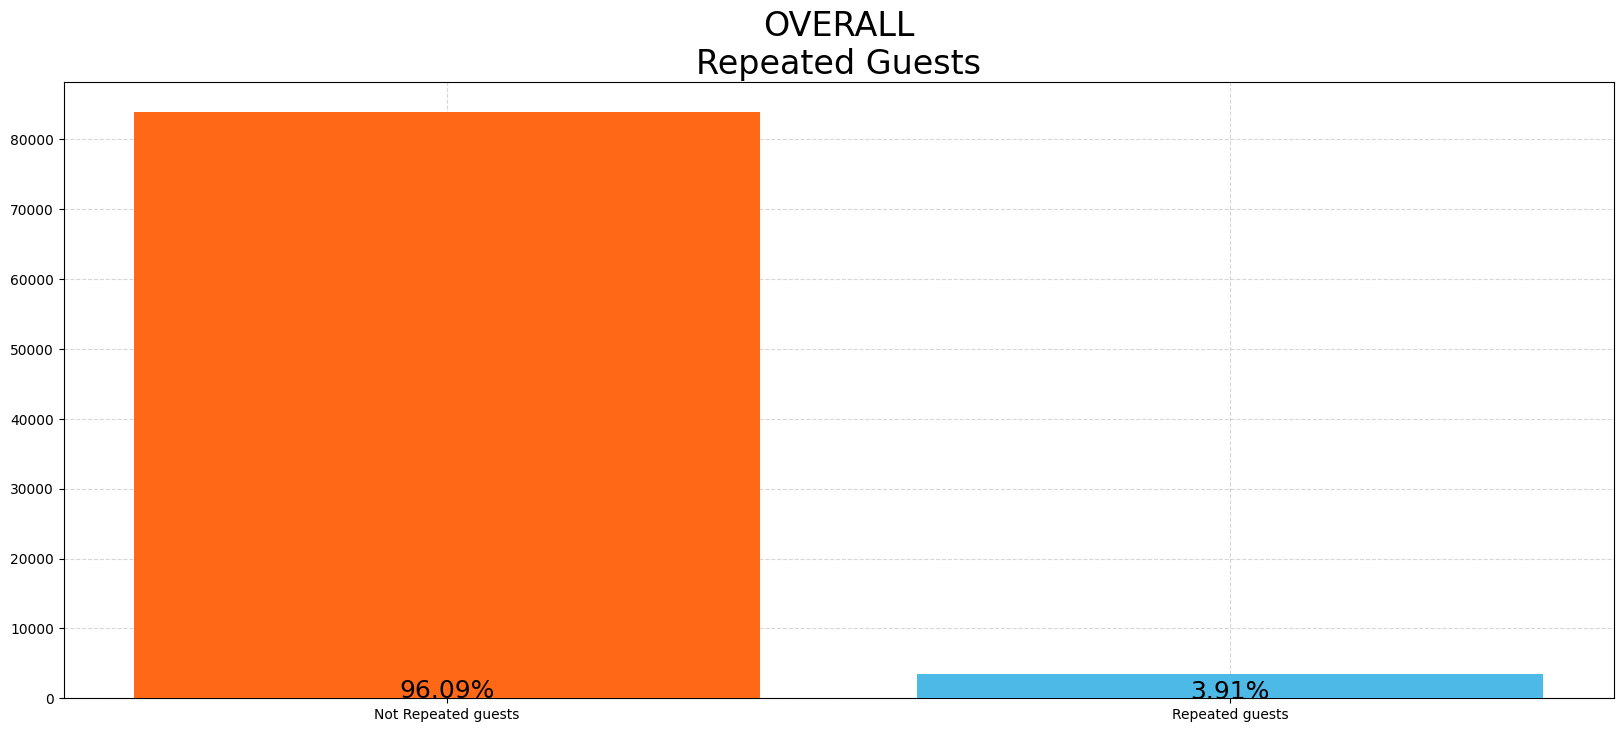

In [508]:
plt.figure(figsize=(20, 8))
my_countplot(column='is_repeated_guest', title='OVERALL\nRepeated Guests', bar_xticks=['Not Repeated guests', 'Repeated guests'])